In [ ]:
!pip install torch_ema

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink-c

In [ ]:
!pip install pytorch_fid

In [ ]:
import io
import os
import sys
import torch
import torch.nn.functional as F
import pandas as pd
import torch.nn as nn
from tqdm.notebook import tqdm
from torchvision.datasets import MNIST
from torch_ema import ExponentialMovingAverage
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau


import pprint
from json import dump
from torch import cuda
import matplotlib.pyplot as plt
from torch.optim import Adam, AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau, LinearLR

from pytorch_fid import fid_score
import torchvision
import tempfile

In [ ]:
import os
import torch
import pprint
import pandas as pd
from json import dump
from torch import cuda
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torch.optim import Adam, AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau, LinearLR


In [ ]:
import gdown

file_id = '1BIj4XqhVKdxIulY6SuDWwZB8QfmCyPMm'

output = 'images.rar'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1BIj4XqhVKdxIulY6SuDWwZB8QfmCyPMm
From (redirected): https://drive.google.com/uc?id=1BIj4XqhVKdxIulY6SuDWwZB8QfmCyPMm&confirm=t&uuid=5d6cfd8c-2d2b-4f11-a572-d4db3157eaa1
To: /content/images.rar
100%|██████████| 12.0M/12.0M [00:00<00:00, 42.6MB/s]


'images.rar'

In [ ]:
!mkdir images
!unrar x images.rar images/

Streaming output truncated to the last 5000 lines.
Extracting  images/images/55.jpg                                          74%  OK 
Extracting  images/images/550.jpg                                         74%  OK 
Extracting  images/images/5500.jpg                                        74%  OK 
Extracting  images/images/5501.jpg                                        74%  OK 
Extracting  images/images/5502.jpg                                        74%  OK 
Extracting  images/images/5503.jpg                                        74%  OK 
Extracting  images/images/5504.jpg                                        74%  OK 
Extracting  images/images/5505.jpg                                        74%  OK 
Extracting  images/images/5506.jpg                                        74%  OK 
Extracting  images/images/5507.jpg                                        74%  OK 
Extracting  images/images/550

#images themselves


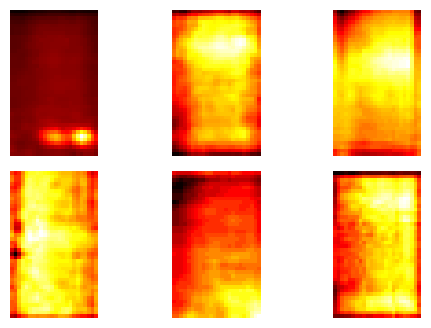

In [ ]:
import os

image_dir = 'images/images'
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

plt.figure(figsize=(5,5))
for i in range(min(6, len(image_files))):
    img = Image.open(os.path.join(image_dir, image_files[i]))
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='hot') # Added cmap='hot'
    plt.axis('off')
plt.tight_layout()
plt.show()

Json download

In [ ]:
!gdown 1yhLik8ykCOiwgHIruG-ZgKSawZDUt-aj

Downloading...
From: https://drive.google.com/uc?id=1yhLik8ykCOiwgHIruG-ZgKSawZDUt-aj
To: /content/module_metadata.json
100% 1.56M/1.56M [00:00<00:00, 112MB/s]


In [ ]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Paths
image_dir = 'images/images'
json_file = 'module_metadata.json'

# Load labels from JSON file
def load_labels(json_path):
    """Load labels from JSON file"""
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        return data
    except FileNotFoundError:
        print(f"File {json_path} not found!")
        return None
    except json.JSONDecodeError:
        print(f"Error reading JSON file: {json_path}")
        return None

# Get list of images
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f"Number of images found: {len(image_files)}")

# Load labels
labels_data = load_labels(json_file)

if labels_data is not None:
    print("Sample JSON structure:")
    print(json.dumps(labels_data, indent=2, ensure_ascii=False)[:500] + "...")

# Function to find label for each image
def find_label_for_image(image_filename, labels_data):
    """Find label for image based on filename"""
    if labels_data is None:
        return "No label"

    # Remove file extension for comparison
    image_name = os.path.splitext(image_filename)[0]

    # Different methods to find label (depending on JSON structure)

    # If JSON is a list
    if isinstance(labels_data, list):
        for item in labels_data:
            if isinstance(item, dict):
                # Search in different possible keys
                for key in ['filename', 'image', 'name', 'id']:
                    if key in item and image_name in str(item[key]):
                        label = item.get('label', item.get('class', item.get('category', item.get('defect_type', 'Unknown'))))
                        # Convert dict labels to string
                        if isinstance(label, dict):
                            return str(label)
                        return label

    # If JSON is a dictionary
    elif isinstance(labels_data, dict):
        # Direct search with filename
        if image_name in labels_data:
            label = labels_data[image_name]
            if isinstance(label, dict):
                return str(label)
            return label
        if image_filename in labels_data:
            label = labels_data[image_filename]
            if isinstance(label, dict):
                return str(label)
            return label

        # Search in different keys
        for key, value in labels_data.items():
            if image_name in key or key in image_name:
                if isinstance(value, dict):
                    return str(value)
                return value
            if isinstance(value, dict) and 'label' in value:
                label = value['label']
                if isinstance(label, dict):
                    return str(label)
                return label

    return "Label not found"

# Display images with labels
def display_images_with_labels(num_images=9):
    """Display images with their labels"""
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.suptitle('Infrared Solar Panel Images with Labels', fontsize=16, y=0.95)

    for i in range(min(num_images, len(image_files))):
        row = i // 3
        col = i % 3

        # Read image
        img_path = os.path.join(image_dir, image_files[i])
        img = Image.open(img_path)

        # Find label
        label = find_label_for_image(image_files[i], labels_data)

        # Display image
        axes[row, col].imshow(img, cmap='hot')  # cmap='hot' is suitable for infrared images
        axes[row, col].set_title(f'{image_files[i]}\nLabel: {label}', fontsize=8, wrap=True)
        axes[row, col].axis('off')

        print(f"Image {i+1}: {image_files[i]} -> Label: {label}")

    # Hide extra axes
    for i in range(num_images, 9):
        row = i // 3
        col = i % 3
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()



Number of images found: 20000
Sample JSON structure:
{
  "13357": {
    "image_filepath": "images/13357.jpg",
    "anomaly_class": "No-Anomaly"
  },
  "13356": {
    "image_filepath": "images/13356.jpg",
    "anomaly_class": "No-Anomaly"
  },
  "19719": {
    "image_filepath": "images/19719.jpg",
    "anomaly_class": "No-Anomaly"
  },
  "11542": {
    "image_filepath": "images/11542.jpg",
    "anomaly_class": "No-Anomaly"
  },
  "11543": {
    "image_filepath": "images/11543.jpg",
    "anomaly_class": "No-Anomaly"
  },
  "11540": {
    "image_file...


In [ ]:

# Prepare dataset for machine learning models
def prepare_dataset():
    """Prepare dataset for model training"""
    images = []
    labels = []
    filenames = []

    for img_file in image_files:
        # Read image
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path)

        # Convert to numpy array
        img_array = np.array(img)

        # Find label
        label = find_label_for_image(img_file, labels_data)

        images.append(img_array)
        labels.append(label)
        filenames.append(img_file)

    return np.array(images), labels, filenames



Image 1: 3869.jpg -> Label: {'image_filepath': 'images/3869.jpg', 'anomaly_class': 'Cell-Multi'}
Image 2: 15185.jpg -> Label: {'image_filepath': 'images/15185.jpg', 'anomaly_class': 'No-Anomaly'}
Image 3: 16953.jpg -> Label: {'image_filepath': 'images/16953.jpg', 'anomaly_class': 'No-Anomaly'}
Image 4: 15993.jpg -> Label: {'image_filepath': 'images/15993.jpg', 'anomaly_class': 'No-Anomaly'}
Image 5: 15563.jpg -> Label: {'image_filepath': 'images/15563.jpg', 'anomaly_class': 'No-Anomaly'}
Image 6: 14399.jpg -> Label: {'image_filepath': 'images/14399.jpg', 'anomaly_class': 'No-Anomaly'}
Image 7: 8625.jpg -> Label: {'image_filepath': 'images/8625.jpg', 'anomaly_class': 'Vegetation'}
Image 8: 19484.jpg -> Label: {'image_filepath': 'images/19484.jpg', 'anomaly_class': 'No-Anomaly'}
Image 9: 9728.jpg -> Label: {'image_filepath': 'images/9728.jpg', 'anomaly_class': 'Vegetation'}


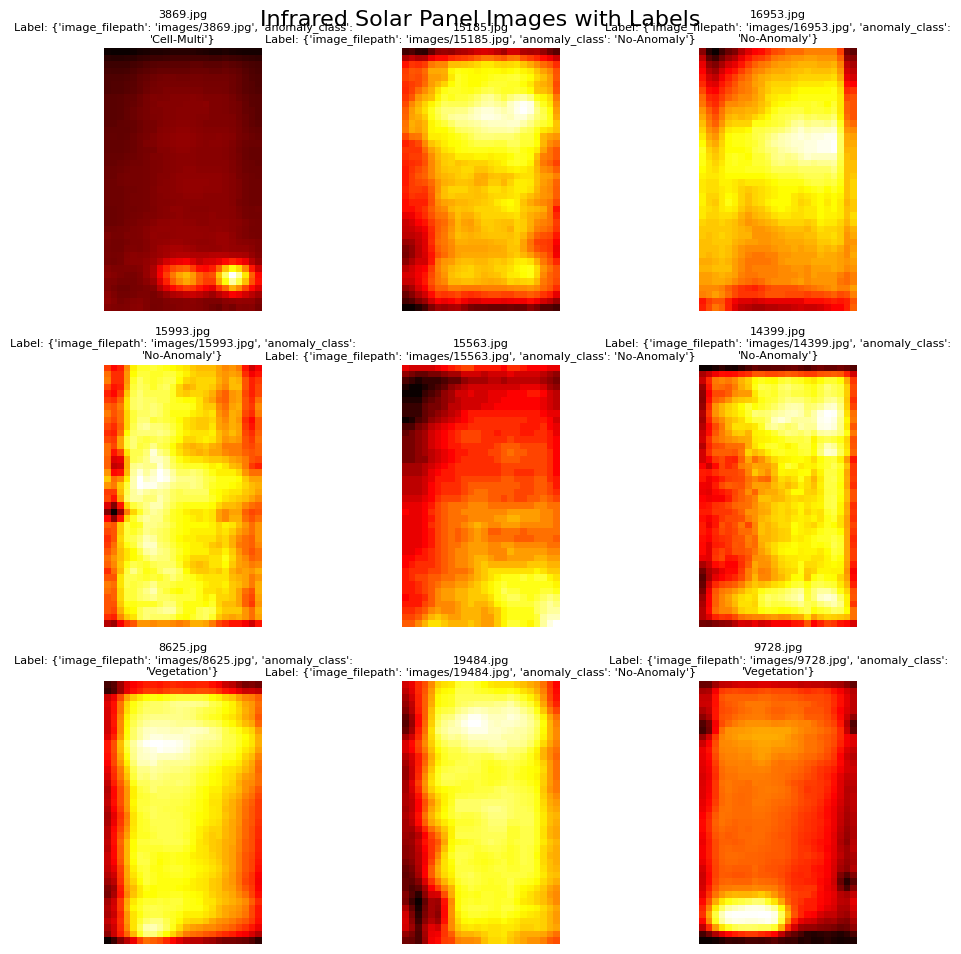

In [ ]:
display_images_with_labels()

Image 1: 18510.jpg -> Label: {'image_filepath': 'images/18510.jpg', 'anomaly_class': 'No-Anomaly'}
Image 2: 12037.jpg -> Label: {'image_filepath': 'images/12037.jpg', 'anomaly_class': 'No-Anomaly'}
Image 3: 9922.jpg -> Label: {'image_filepath': 'images/9922.jpg', 'anomaly_class': 'Vegetation'}
Image 4: 12727.jpg -> Label: {'image_filepath': 'images/12727.jpg', 'anomaly_class': 'No-Anomaly'}
Image 5: 5568.jpg -> Label: {'image_filepath': 'images/5568.jpg', 'anomaly_class': 'Cell'}
Image 6: 18744.jpg -> Label: {'image_filepath': 'images/18744.jpg', 'anomaly_class': 'No-Anomaly'}
Image 7: 15815.jpg -> Label: {'image_filepath': 'images/15815.jpg', 'anomaly_class': 'No-Anomaly'}
Image 8: 15519.jpg -> Label: {'image_filepath': 'images/15519.jpg', 'anomaly_class': 'No-Anomaly'}
Image 9: 3454.jpg -> Label: {'image_filepath': 'images/3454.jpg', 'anomaly_class': 'Shadowing'}


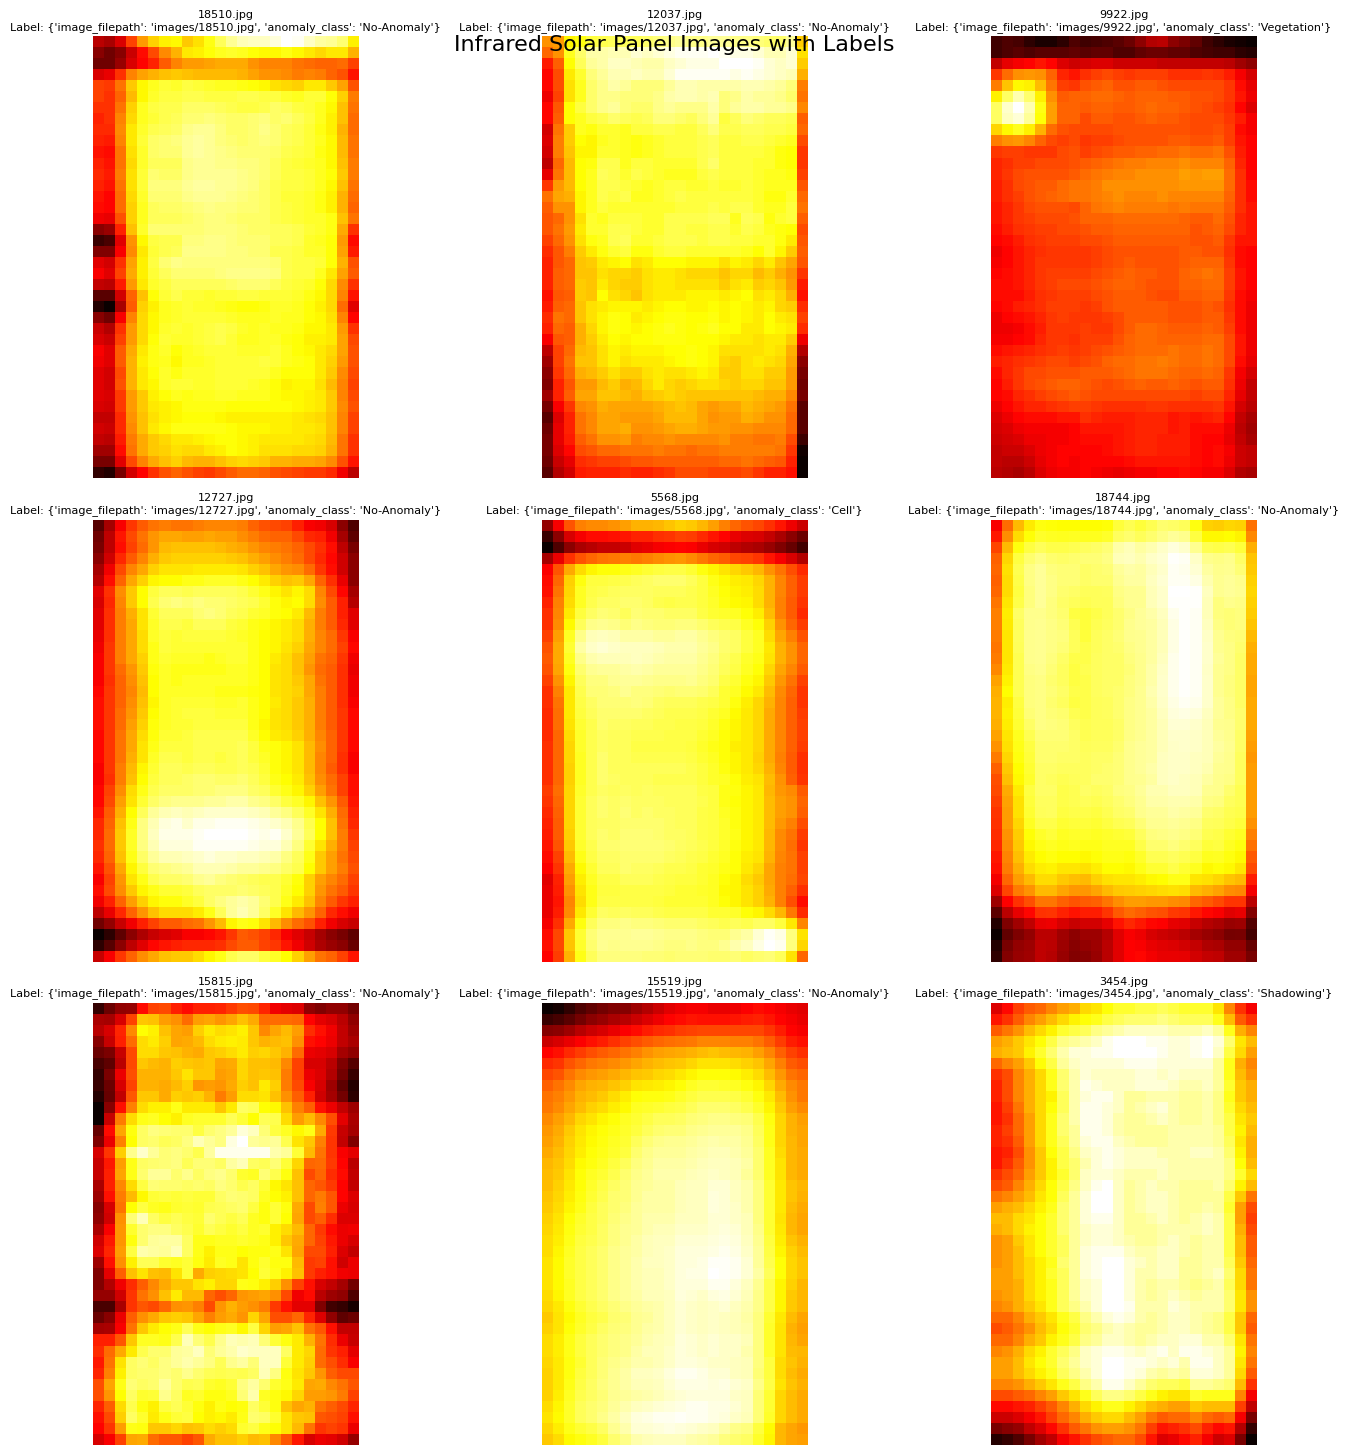


Dataset information:
Images array shape: (20000, 40, 24)
Number of labels: 20000
Unique labels: {"{'image_filepath': 'images/10405.jpg', 'anomaly_class': 'No-Anomaly'}", "{'image_filepath': 'images/14957.jpg', 'anomaly_class': 'No-Anomaly'}", "{'image_filepath': 'images/13383.jpg', 'anomaly_class': 'No-Anomaly'}", "{'image_filepath': 'images/158.jpg', 'anomaly_class': 'Offline-Module'}", "{'image_filepath': 'images/459.jpg', 'anomaly_class': 'Offline-Module'}", "{'image_filepath': 'images/9968.jpg', 'anomaly_class': 'Vegetation'}", "{'image_filepath': 'images/4625.jpg', 'anomaly_class': 'Cell-Multi'}", "{'image_filepath': 'images/14185.jpg', 'anomaly_class': 'No-Anomaly'}", "{'image_filepath': 'images/9342.jpg', 'anomaly_class': 'Vegetation'}", "{'image_filepath': 'images/12044.jpg', 'anomaly_class': 'No-Anomaly'}", "{'image_filepath': 'images/2868.jpg', 'anomaly_class': 'Shadowing'}", "{'image_filepath': 'images/7384.jpg', 'anomaly_class': 'Cracking'}", "{'image_filepath': 'images/15

In [ ]:
# Main execution
if __name__ == "__main__":
    # Display images with labels
    display_images_with_labels()

    # Prepare dataset
    images_array, labels_list, filenames_list = prepare_dataset()

    print(f"\nDataset information:")
    print(f"Images array shape: {images_array.shape}")
    print(f"Number of labels: {len(labels_list)}")

    # Convert dict labels to strings and get unique labels
    try:
        # Convert all labels to strings to handle dict labels
        string_labels = [str(label) for label in labels_list]
        unique_labels = set(string_labels)
        print(f"Unique labels: {unique_labels}")

        # Show label distribution
        from collections import Counter
        label_counts = Counter(string_labels)
        print(f"\nLabel distribution:")
        for label, count in label_counts.items():
            print(f"  {label}: {count} images")

    except Exception as e:
        print(f"Error processing labels: {e}")
        print("Raw labels sample:")
        for i, label in enumerate(labels_list[:5]):
            print(f"  Image {i+1}: {type(label)} - {label}")

In [ ]:
# Helper function to analyze JSON structure
def analyze_json_structure(json_path):
    """Analyze JSON file structure"""
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        print("JSON Structure Analysis:")
        print(f"Main data type: {type(data)}")

        if isinstance(data, list):
            print(f"Number of items: {len(data)}")
            if len(data) > 0:
                print(f"First item type: {type(data[0])}")
                if isinstance(data[0], dict):
                    print(f"First item keys: {list(data[0].keys())}")
                    print(f"First item sample: {data[0]}")

        elif isinstance(data, dict):
            print(f"Number of keys: {len(data)}")
            print(f"Sample keys: {list(data.keys())[:5]}")

            # Show sample values
            for i, (key, value) in enumerate(list(data.items())[:3]):
                print(f"Key {i+1}: {key} -> {type(value)} - {value}")

        return data
    except Exception as e:
        print(f"Error analyzing JSON: {e}")
        return None


In [ ]:
import json
from collections import Counter

# 1. Define strict anomaly classes
ANOMALY_LABELS = [
    'Cell',
    'Cell-Multi',
    'Cracking',
    'Hot-Spot',
    'Hot-Spot-Multi',
    'Shadowing',
    'Diode',
    'Diode-Multi',
    'Vegetation',
    'Soiling',
    'Offline-Module',
    'No-Anomaly'  # Normal case
]

LABEL_TO_ID = {label: idx + 1 for idx, label in enumerate(ANOMALY_LABELS) if label != 'No-Anomaly'}
LABEL_TO_ID['No-Anomaly'] = 0
ID_TO_LABEL = {v: k for k, v in LABEL_TO_ID.items()}

# 2. Function to find label for an image
def find_label_for_image(image_filename, labels_data):
    """Find label entry for a given image"""
    image_id = image_filename.replace('.jpg', '').replace('images/', '')
    return labels_data.get(image_id, {}).get('anomaly_class', 'Unknown')

# 3. Function to get numerical label
def get_numerical_label(image_filename, labels_data):
    """Get numerical label using strict class mapping"""
    raw_label = find_label_for_image(image_filename, labels_data)
    raw_label = str(raw_label).strip().replace('_', '-')

    if raw_label in LABEL_TO_ID:
        return LABEL_TO_ID[raw_label], raw_label
    else:
        return -1, raw_label  # Unknown label

def create_image_label_mapping(image_files, labels_data):
    """Map each image to its numerical label, excluding unknown labels"""
    mapping = {}
    numerical_mapping = {}

    for img_file in image_files:
        num_label, clean_label = get_numerical_label(img_file, labels_data)

        if num_label == -1:
            continue  # Skip unknown labels

        mapping[img_file] = {
            'raw_label': find_label_for_image(img_file, labels_data),
            'clean_label': clean_label,
            'numerical_label': num_label
        }
        numerical_mapping[img_file] = num_label

    return mapping, numerical_mapping

# 5. Save labels to JSON
def save_labels_to_file(mapping, filename='image_labels.json'):
    """Save image-label mapping to JSON file"""
    clean_mapping = {
        img: {
            'raw_label': str(info['raw_label']),
            'clean_label': str(info['clean_label']),
            'numerical_label': int(info['numerical_label'])
        }
        for img, info in mapping.items()
    }

    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(clean_mapping, f, indent=2, ensure_ascii=False)
        print(f"Labels saved to {filename}")
    except Exception as e:
        print(f"Error saving labels: {e}")

# 6. Display label statistics
def display_label_statistics(mapping):
    numerical_labels = [info['numerical_label'] for info in mapping.values()]
    clean_labels = [info['clean_label'] for info in mapping.values()]

    print("\nLabel Statistics:")
    print("=" * 50)

    num_counts = Counter(numerical_labels)
    print("Numerical Label Distribution:")
    for num, count in sorted(num_counts.items()):
        print(f"  {num}: {count} images ({ID_TO_LABEL.get(num, 'Unknown')})")

    print("\nText Label Distribution:")
    text_counts = Counter(clean_labels)
    for label, count in text_counts.most_common():
        print(f"  '{label}': {count} images")

    return num_counts, text_counts

# === USAGE EXAMPLE ===

# Load JSON
with open('module_metadata.json', 'r', encoding='utf-8') as f:
    labels_data = json.load(f)

# Collect image filenames (example assuming all images named from 1.jpg to 20000.jpg)
image_files = [f"{i}.jpg" for i in range(1, 20001)]

# Generate mappings
mapping, numerical_mapping = create_image_label_mapping(image_files, labels_data)

# Show sample
print("\nSample Mapping:")
for img, info in list(mapping.items())[:5]:
    print(f"{img}: {info['clean_label']} -> {info['numerical_label']}")

# Save to file
save_labels_to_file(mapping)

# Display statistics
display_label_statistics(mapping)



Sample Mapping:
1.jpg: Offline-Module -> 11
2.jpg: Offline-Module -> 11
3.jpg: Offline-Module -> 11
4.jpg: Offline-Module -> 11
5.jpg: Offline-Module -> 11
Labels saved to image_labels.json

Label Statistics:
Numerical Label Distribution:
  0: 10000 images (No-Anomaly)
  1: 1877 images (Cell)
  2: 1288 images (Cell-Multi)
  3: 940 images (Cracking)
  4: 249 images (Hot-Spot)
  5: 246 images (Hot-Spot-Multi)
  6: 1056 images (Shadowing)
  7: 1499 images (Diode)
  8: 175 images (Diode-Multi)
  9: 1639 images (Vegetation)
  10: 204 images (Soiling)
  11: 826 images (Offline-Module)

Text Label Distribution:
  'No-Anomaly': 10000 images
  'Cell': 1877 images
  'Vegetation': 1639 images
  'Diode': 1499 images
  'Cell-Multi': 1288 images
  'Shadowing': 1056 images
  'Cracking': 940 images
  'Offline-Module': 826 images
  'Hot-Spot': 249 images
  'Hot-Spot-Multi': 246 images
  'Soiling': 204 images
  'Diode-Multi': 175 images


(Counter({11: 826,
          8: 175,
          7: 1499,
          6: 1056,
          2: 1288,
          1: 1877,
          4: 249,
          3: 940,
          5: 246,
          10: 204,
          9: 1639,
          0: 10000}),
 Counter({'Offline-Module': 826,
          'Diode-Multi': 175,
          'Diode': 1499,
          'Shadowing': 1056,
          'Cell-Multi': 1288,
          'Cell': 1877,
          'Hot-Spot': 249,
          'Cracking': 940,
          'Hot-Spot-Multi': 246,
          'Soiling': 204,
          'Vegetation': 1639,
          'No-Anomaly': 10000}))

In [ ]:
import torch

# === 7. Extract label vector as PyTorch tensor ===
label_vector = list(numerical_mapping.values())  # خروجی مثل [0, 1, 3, 2, 0, ...]
label_tensor = torch.tensor(label_vector, dtype=torch.long)  # shape: [N]

print("\nLabel Tensor:")
print(label_tensor[:10])  # نمایش اولین ۱۰ تا برای تست

# === 8. Optional: Convert to one-hot vectors ===
num_classes = len(LABEL_TO_ID)
one_hot_labels = torch.nn.functional.one_hot(label_tensor, num_classes=num_classes).float()  # shape: [N, C]

print("\nOne-hot encoded labels:")
print(one_hot_labels[:5])  # نمایش ۵ نمونه اول



Label Tensor:
tensor([11, 11, 11, 11, 11, 11, 11, 11, 11, 11])

One-hot encoded labels:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])


In [ ]:

class TrainArgs():
    def __init__(self,
                 trainIdx: int,
                 batchSize: int,
                 numEpochs: int,
                 gLearningRate: float,
                 dLearningRate: float,
                 optimizer: str,
                 initType: str,
                 numClasses: int,
                 latentZDim: int,
                 seqLen: int,
                 labelEmbedDim: int,
                 genDepth: int,
                 disDepth: int,
                 genNumHeads: int,
                 disNumHeads: int,
                 lambdaGP: float,
                 lambdaCls: float,
                 inputNoiseLatentDim: int,
                 genHiddenEmbedDim: int, disHiddenEmbedDim: int,
                 noiseRandomLabelEmbedDim: int,
                 genForwardDropout: float,
                 genAttnDropout: float,
                 disForwardDropout: float,
                 disAttnDropout: float,
                 genForwardExpansion: int,
                 disForwardExpansion: int,
                 imageSize: int,
                 advClasses: int,
                 clsHeadExpansion: int,
                 advHeadExpansion: int,
                 betas: tuple,
                 seed: int,
                 emaDecay: float,
                 emaFreq: int,
                 minDLr: float,
                 minGLr: float,
                 normClipDis,
                 normClipGen,
                 numWorkers: int = 2,
 ) -> None:

        self.device = 'cuda' if cuda.is_available() else 'cpu'
        self.trainIdx = trainIdx
        self.trainRoot = f'./train{trainIdx}'
        self.batchSize = batchSize
        self.numEpochs = numEpochs
        self.optimizer = optimizer
        self.initType = initType
        self.imageSize = imageSize
        self.numWorkers = numWorkers

        self.gLearningRate = gLearningRate
        self.dLearningRate = dLearningRate

        self.genDepth = genDepth
        self.disDepth = disDepth
        self.genNumHeads = genNumHeads
        self.disNumHeads = disNumHeads

        self.numClasses = numClasses
        self.seqLen = seqLen

        # Dimensions
        self.inputNoiseLatentDim = inputNoiseLatentDim
        self.latentZDim = latentZDim
        self.labelEmbedDim = labelEmbedDim
        self.genHiddenEmbedDim = genHiddenEmbedDim
        self.disHiddenEmbedDim = disHiddenEmbedDim
        self.noiseRandomLabelEmbedDim = noiseRandomLabelEmbedDim

        self.lambdaGP = lambdaGP
        self.lambdaCls = lambdaCls

        self.genForwardDropout = genForwardDropout
        self.genAttnDropout = genAttnDropout
        self.disForwardDropout = disForwardDropout
        self.disAttnDropout = disAttnDropout

        self.genForwardExpansion = genForwardExpansion
        self.disForwardExpansion = disForwardExpansion

        self.advClasses = advClasses
        self.clsHeadExpansion = clsHeadExpansion
        self.advHeadExpansion = advHeadExpansion

        self.betas = betas
        self.seed = seed

        self.emaDecay = emaDecay
        self.emaFreq = emaFreq

        self.minDLr = minDLr
        self.minGLr = minGLr
        self.normClipGen = normClipGen
        self.normClipDis = normClipDis

    def log(self) -> None:
        print(f'-> Train{self.trainIdx}: root @ {self.trainRoot}')
        print(60 * '-')
        pprint.pprint(self.__dict__)

    def saveConfig(self) -> None:
        if not os.path.exists(self.trainRoot):
            os.mkdir(self.trainRoot)
        with open(f'{self.trainRoot}' + '/configs.json', 'w') as fp:
            dump(self.__dict__, fp)

def handleOptimizer(optimizer, genNet, disNet, dLR, gLR, betas) -> tuple:
    # Optimizing only the parameters which we know we can apply gradient decent
    if optimizer == 'adamw':
        genOptim = AdamW(filter(lambda p: p.requires_grad, genNet.parameters()),
                        lr = gLR, betas = betas)
        disOptim = AdamW(filter(lambda p: p.requires_grad, disNet.parameters()),
                        lr = dLR, betas = betas)
    else:
        genOptim = Adam(filter(lambda p: p.requires_grad, genNet.parameters()),
                        lr = gLR, betas = betas)
        disOptim = Adam(filter(lambda p: p.requires_grad, disNet.parameters()),
                        lr = dLR, betas = betas)
    return genOptim, disOptim

def handleScheduler(genOptim, disOptim, dLr, gLr, kind, dLrMin, gLrMin,
    iters) -> tuple | None:
    if kind == 'linear':
        genSched = torch.optim.lr_scheduler.LinearLR(genOptim, gLrMin, iters)
        disSched = torch.optim.lr_scheduler.LinearLR(disOptim, dLrMin, iters)
    elif kind == 'plateu':
        genSched = torch.optim.lr_scheduler.ReduceLROnPlateau(genOptim, 'min')
        disSched = torch.optim.lr_scheduler.ReduceLROnPlateau(disOptim, 'min')
    else:
        return None
    schedulers = (genSched, disSched)
    return schedulers


def gridPlot(df: pd.DataFrame, kind: str, epoch: int|str, root: str):
    fig, axs = plt.subplots(1, len(df.columns), sharex = True, sharey = True,
                            figsize = (16, 4))
    for i, col in enumerate(df.columns):
        axs[i].plot(df[col], color='black')
        axs[i].set_xlabel('Number of Epochs')
        axs[i].set_ylabel(col.title())

    for ax in axs:
        ax.tick_params(axis='y', which='both', labelleft=True)  # Ensure y-axis ticks are visible

    if not os.path.exists(root + '/plots/'):
        os.mkdir(root + '/plots/')
    if type(epoch) == int:
        plt.savefig(root + f'/plots/{kind}_plots_epoch_{epoch + 1}.jpeg')
    else:
        plt.savefig(root + f'/plots/{kind}_plots_epoch_{epoch}.jpeg')
    plt.show()

def gradientPenalty(y, x, device):
    weight = torch.ones(y.size()).to(device)
    dydx = torch.autograd.grad(outputs = y,
                               inputs = x, grad_outputs = weight,
                               retain_graph = True, create_graph = True,
                               only_inputs = True)[0]
    dydx = dydx.view(dydx.size(0), -1)
    dydxL2Norm = torch.sqrt(torch.sum(dydx ** 2, dim = 1))
    return torch.mean((dydxL2Norm - 1) ** 2)

def concatenate(vars: list, indices: list, df: pd.DataFrame):
    newSeries = pd.Series(vars, index = indices)
    newDf = pd.concat([df, newSeries.to_frame().T], ignore_index = True)
    return newDf

# Weight initialization for different kinds of layers
def weightInit(m, args):
    classname = m.__class__.__name__
    if classname.find('Conv2d') != -1:
        if args.initType == 'normal':
            torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
        elif args.initType == 'orth':
            torch.nn.init.orthogonal_(m.weight.data)
        elif args.initType == 'xavier_uniform':
            torch.nn.init.xavier_uniform_(m.weight.data, 1.)
        else:
            raise NotImplementedError()
    elif classname.find('BatchNorm2d') != -1:
            torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
            torch.nn.init.constant_(m.bias.data, 0.0)


In [ ]:
def generateTestImgs(genNet: torch.nn.Module, epoch: int, device: str, args):
    genNet.eval()
    fakeData = []
    fakeLabels = []

    # Generate 10 samples for each class
    for label in range(args.numClasses):
        for _ in range(12):  # Generate 10 samples per class
            noise = torch.randn((1, args.inputNoiseLatentDim)).to(device)
            fakeLabel = torch.tensor([label]).to(device)  # Deterministic label
            fakeSignal = genNet(noise, fakeLabel)
            fakeSignal = fakeSignal[0, 0, :, :]
            fakeImage = T.ToPILImage()(fakeSignal.cpu().detach())
            fakeData.append(fakeImage)
            fakeLabels.append(fakeLabel.item())

    # Create a 10x10 grid of subplots
    fig, axs = plt.subplots(args.numClasses, 10, figsize=(20, 20))
    # fig.suptitle(f'Synthetic data at epoch {epoch + 1}')

    # Plot the generated images
    for i in range(args.numClasses):
        for j in range(10):
            image_index = i * 10 + j  # Calculate index in fakeData
            axs[i, j].imshow(fakeData[image_index], cmap='gray')
            axs[i, j].title.set_text(str(fakeLabels[image_index]))
            axs[i, j].axis('off')

    # Save and display the figure
    if not os.path.exists(args.trainRoot + '/gens/'):
        os.mkdir(args.trainRoot + '/gens/')
    plt.savefig(args.trainRoot + f'/gens/gen_epoch_{epoch + 1}.jpeg')
    plt.show()

In [ ]:
def calculate_fid_custom(real_data, generated_data, device='cpu', dims=2048, Batch_Size=50):
    """
    Calculates the FID score between real and generated data.

    Args:
        real_data: Real image tensor.
        generated_data: Generated image tensor.
        device: Device to perform calculations on ('cpu' or 'cuda').
        dims: Dimensionality of Inception features.

    Returns:
        FID score.
    """
    # Ensure data is on the correct device
    real_data = real_data.to(device)
    generated_data = generated_data.to(device)

    # Create temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images
        for i, img in enumerate(real_data):
            torchvision.utils.save_image(img, os.path.join(real_dir, f'{i}.png'))

        # Save generated images
        for i, img in enumerate(generated_data):
            torchvision.utils.save_image(img, os.path.join(gen_dir, f'{i}.png'))

        # Disable tqdm progress bars
        os.environ['TQDM_DISABLE'] = '1'

        # Calculate FID using pytorch-fid
        fid_value = fid_score.calculate_fid_given_paths(
            paths=[real_dir, gen_dir],
            batch_size=Batch_Size,  # Adjust batch size if needed
            device=device,
            dims=dims
        )

    return fid_value

In [ ]:
from torch import Tensor
from torchvision.transforms import Compose, Resize, ToTensor
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce


In [ ]:
class Generator(nn.Module):
    def __init__(self, image_size, num_classes, latent_dim, data_embed_dim,
                label_embed_dim ,depth, num_heads,
                forward_drop_rate, attn_drop_rate,forward_expansion):
        super(Generator, self).__init__()
        self.image_size = image_size
        self.num_classes = num_classes
        self.latent_dim = latent_dim
        self.data_embed_dim = data_embed_dim
        self.label_embed_dim = label_embed_dim
        self.depth = depth
        self.num_heads = num_heads
        self.attn_drop_rate = attn_drop_rate
        self.forward_drop_rate = forward_drop_rate
        self.forward_expansion = forward_expansion

        self.l1 = nn.Linear(self.latent_dim + self.label_embed_dim, self.image_size * self.data_embed_dim)
        self.label_embedding = nn.Embedding(self.num_classes, self.label_embed_dim)

        self.blocks = Gen_TransformerEncoder(
                 depth=self.depth,
                 emb_size = self.data_embed_dim,
                 num_heads = self.num_heads,
                 drop_p = self.attn_drop_rate,
                 forward_drop_p=self.forward_drop_rate,
                 forward_expansion = self.forward_expansion
                )

        self.deconv = nn.Sequential(
            nn.Conv2d(self.data_embed_dim, 1, 1, 1, 0)
        )
        self.output_layer = nn.Sequential(
            nn.Sigmoid()
        )

    def forward(self, z, labels):
        c = self.label_embedding(labels)
        x = torch.cat([z, c], 1)
        x = self.l1(x)
        x = x.view(-1, self.image_size, self.data_embed_dim)
        x = self.blocks(x)
        x = x.reshape(x.shape[0], 1, x.shape[1], x.shape[2])
        output = self.deconv(x.permute(0, 3, 1, 2))
        output = output.permute(0,2,1,3)
        output = self.output_layer(output)
        return output


class Gen_TransformerEncoderBlock(nn.Sequential):
    def __init__(self,
                 emb_size,
                 num_heads,
                 drop_p,
                 forward_expansion,
                 forward_drop_p
                 ):
        super().__init__(
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                MultiHeadAttention(emb_size, num_heads, drop_p),
                nn.Dropout(drop_p)
            )),
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                FeedForwardBlock(
                    emb_size, expansion=forward_expansion, drop_p=forward_drop_p),
                nn.Dropout(drop_p)
            )
            ))

class Gen_TransformerEncoder(nn.Sequential):
    def __init__(self, depth, **kwargs):
        super().__init__(*[Gen_TransformerEncoderBlock(**kwargs) for _ in range(depth)])


class MultiHeadAttention(nn.Module):
    def __init__(self, emb_size, num_heads, dropout):
        super().__init__()
        self.emb_size = emb_size
        self.num_heads = num_heads
        self.keys = nn.Linear(emb_size, emb_size)
        self.queries = nn.Linear(emb_size, emb_size)
        self.values = nn.Linear(emb_size, emb_size)
        self.att_drop = nn.Dropout(dropout)
        self.projection = nn.Linear(emb_size, emb_size)

    def forward(self, x: Tensor, mask: Tensor = None) -> Tensor:
        queries = rearrange(self.queries(x), "b n (h d) -> b h n d", h=self.num_heads).contiguous()
        keys = rearrange(self.keys(x), "b n (h d) -> b h n d", h=self.num_heads).contiguous()
        values = rearrange(self.values(x), "b n (h d) -> b h n d", h=self.num_heads).contiguous()
        energy = torch.einsum('bhqd, bhkd -> bhqk', queries, keys)  # batch, num_heads, query_len, key_len
        if mask is not None:
            fill_value = torch.finfo(self.device).min
            energy.mask_fill(~mask, fill_value)

        scaling = self.emb_size ** (1 / 2)
        att = F.softmax(energy / scaling, dim=-1)
        att = self.att_drop(att)
        out = torch.einsum('bhal, bhlv -> bhav ', att, values)
        out = rearrange(out, "b h n d -> b n (h d)")
        out = self.projection(out)
        return out


class ResidualAdd(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, **kwargs):
        res = x
        x = self.fn(x, **kwargs)
        x += res
        return x


class FeedForwardBlock(nn.Sequential):
    def __init__(self, emb_size, expansion, drop_p):
        super().__init__(
            nn.Linear(emb_size, expansion * emb_size),
            nn.GELU(),
            nn.Dropout(drop_p),
            nn.Linear(expansion * emb_size, emb_size),
        )



class Dis_TransformerEncoderBlock(nn.Sequential):
    def __init__(self,
                 emb_size,
                 num_heads,
                 drop_p,
                 forward_expansion,
                 forward_drop_p):
        super().__init__(
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                MultiHeadAttention(emb_size, num_heads, drop_p),
                nn.Dropout(drop_p)
            )),
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                FeedForwardBlock(
                    emb_size, expansion=forward_expansion, drop_p=forward_drop_p),
                nn.Dropout(drop_p)
            )
            ))


class Dis_TransformerEncoder(nn.Sequential):
    def __init__(self, depth, **kwargs):
        super().__init__(*[Dis_TransformerEncoderBlock(**kwargs) for _ in range(depth)])


class ClassificationHead(nn.Sequential):
    def __init__(self, emb_size, cls_classes,adv_classes,cls_expansion,adv_expansion):
        super().__init__()
        self.adv_head = nn.Sequential(
            nn.LayerNorm(emb_size),
            nn.Linear(emb_size, adv_expansion*emb_size),
            nn.LeakyReLU(0.2),
            nn.Linear(adv_expansion*emb_size, emb_size),
            nn.LeakyReLU(0.2),
            nn.Linear(emb_size, adv_classes)
        )
        self.cls_head = nn.Sequential(
            nn.LayerNorm(emb_size),
            nn.Linear(emb_size, cls_expansion*emb_size),
            nn.LeakyReLU(0.2),
            nn.Linear(cls_expansion*emb_size, emb_size),
            nn.LeakyReLU(0.2),
            nn.Linear(emb_size, cls_classes)
        )


    def forward(self, x):
        x = Reduce('b n e -> b e', reduction='mean')(x)
        out_adv = self.adv_head(x)
        out_cls = self.cls_head(x)
        return out_adv, out_cls


class PatchEmbedding_Linear(nn.Module):
    def __init__(self, emb_size, seq_length , image_size):
        super().__init__()
        # Ensure the image dimensions match the expected sequence length
        # The input is b, c, h, w. We want to flatten h and w into a sequence length.
        # seq_length should be h * w
        assert seq_length == image_size * image_size, "Sequence length must be image_size * image_size"
        self.projection = nn.Sequential(
            # Flatten the spatial dimensions (height and width) into a single sequence dimension
            Rearrange('b c h w -> b (h w) c'),
            # Project the channels dimension to the embedding size
            nn.Linear(1, emb_size) # Assuming input has 1 channel (grayscale)
        )
        self.cls_token = nn.Parameter(torch.randn(1, 1, emb_size))
        # The number of positions is the sequence length (h*w) + 1 for the classification token
        self.positions = nn.Parameter(torch.randn(image_size * image_size + 1, emb_size))


    def forward(self, x:Tensor) ->Tensor:
        b, c, h, w = x.shape
        # Ensure input has 1 channel as expected by the Linear layer
        assert c == 1, f"Expected input with 1 channel, but got {c}"

        x = self.projection(x)
        cls_tokens = repeat(self.cls_token, '() n e -> b n e', b=b)
        #prepend the cls token to the input
        x = torch.cat([cls_tokens, x], dim=1)
        # position
        x += self.positions[:x.shape[1], :] # Use slicing to match sequence length + 1
        return x

class Discriminator(nn.Sequential):
    def __init__(self,
                 data_emb_siz,
                 seq_length ,
                 depth,
                 n_classes,
                 num_heads,
                 forward_expansion,
                 image_size,
                 drop_p,
                 forward_drop_p,
                 adv_classes,
                 cls_expansion,
                 adv_expansion
                 ):
        super().__init__(
            PatchEmbedding_Linear(emb_size = data_emb_siz, seq_length = seq_length, image_size=image_size),
            Dis_TransformerEncoder(depth=depth,num_heads=num_heads, emb_size=data_emb_siz, drop_p=drop_p, forward_drop_p=forward_drop_p,forward_expansion=forward_expansion),
            ClassificationHead(emb_size=data_emb_siz, cls_classes=n_classes,adv_classes=adv_classes,cls_expansion=cls_expansion,adv_expansion=adv_expansion)
        )

In [ ]:
args = TrainArgs(
    trainIdx = 1,
    batchSize = 16,  # Reduced for memory efficiency
    numEpochs = 50,  # Reduced for testing
    gLearningRate = 0.0001,
    dLearningRate = 0.0002,
    optimizer = 'adamw',
    initType = 'xavier_uniform',
    genDepth = 2,    # Reduced for faster training
    disDepth = 2,    # Reduced for faster training
    genNumHeads = 4, # Reduced for faster training
    disNumHeads = 4, # Reduced for faster training
    numClasses = 12, # Your 12 classes
    latentZDim = 100,
    imageSize = 32,  # Start smaller for faster training
    seqLen = 32 * 32, # Correct sequence length for image size
    lambdaGP = 10,
    lambdaCls = 1,
    labelEmbedDim = 12,  # Match number of classes
    inputNoiseLatentDim = 128,
    genHiddenEmbedDim = 64,  # Reduced for memory
    disHiddenEmbedDim = 128, # Reduced for memory
    noiseRandomLabelEmbedDim = 16,
    genForwardDropout = 0.3,
    genAttnDropout = 0.3,
    disForwardDropout = 0.3,
    disAttnDropout = 0.3,
    genForwardExpansion = 2, # Reduced for memory
    disForwardExpansion = 2, # Reduced for memory
    advClasses = 1,
    clsHeadExpansion = 1,
    advHeadExpansion = 1,
    betas = (.9, .999),
    seed = 42,
    emaDecay = 0.1,
    emaFreq = 10,
    minGLr = 0.000001,
    minDLr = 0.000001,
    normClipDis = 5,
    normClipGen = 0.5,
    numWorkers = 0,  # Set to 0 for debugging
)

In [ ]:
# Dataset and dataloader
transforms = T.Compose([
    T.Resize((args.imageSize, args.imageSize)),
    T.ToTensor()
    ])
Dataset = image_files
train_loader = DataLoader(Dataset, batch_size = args.batchSize, shuffle = True,
                         num_workers = args.numWorkers)

In [ ]:
genNet = Generator(
        image_size = args.imageSize, #32
        num_classes = args.numClasses, #10
        latent_dim = args.inputNoiseLatentDim, #128
        data_embed_dim = args.genHiddenEmbedDim, #128
        label_embed_dim = args.noiseRandomLabelEmbedDim, #16
        depth = args.genDepth,
        num_heads = args.genNumHeads,
        attn_drop_rate = args.genForwardDropout,
        forward_expansion = args.genForwardExpansion,
        forward_drop_rate = args.genAttnDropout,
        )
genNet = genNet.type(torch.float32)
genNet.apply(lambda m: weightInit(m,args)).to(args.device)

Generator(
  (l1): Linear(in_features=144, out_features=2048, bias=True)
  (label_embedding): Embedding(12, 16)
  (blocks): Gen_TransformerEncoder(
    (0): Gen_TransformerEncoderBlock(
      (0): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (1): MultiHeadAttention(
            (keys): Linear(in_features=64, out_features=64, bias=True)
            (queries): Linear(in_features=64, out_features=64, bias=True)
            (values): Linear(in_features=64, out_features=64, bias=True)
            (att_drop): Dropout(p=0.3, inplace=False)
            (projection): Linear(in_features=64, out_features=64, bias=True)
          )
          (2): Dropout(p=0.3, inplace=False)
        )
      )
      (1): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (1): FeedForwardBlock(
            (0): Linear(in_features=64, out_features=128, bias=True)
            (1): 

In [ ]:
disNet = Discriminator(
        data_emb_siz = args.disHiddenEmbedDim,
        seq_length = args.seqLen,
        depth = args.disDepth,
        num_heads = args.disNumHeads,
        image_size = args.imageSize,
        n_classes = args.numClasses,
        drop_p = args.disAttnDropout,
        forward_drop_p = args.disForwardDropout,
        adv_classes = args.advClasses,
        forward_expansion = args.disForwardExpansion,
        cls_expansion = args.clsHeadExpansion,
        adv_expansion = args.advHeadExpansion
        )
disNet = disNet.type(torch.float32)
disNet.apply(lambda m: weightInit(m, args)).to(args.device)

Discriminator(
  (0): PatchEmbedding_Linear(
    (projection): Sequential(
      (0): Rearrange('b c h w -> b (h w) c')
      (1): Linear(in_features=1, out_features=128, bias=True)
    )
  )
  (1): Dis_TransformerEncoder(
    (0): Dis_TransformerEncoderBlock(
      (0): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (1): MultiHeadAttention(
            (keys): Linear(in_features=128, out_features=128, bias=True)
            (queries): Linear(in_features=128, out_features=128, bias=True)
            (values): Linear(in_features=128, out_features=128, bias=True)
            (att_drop): Dropout(p=0.3, inplace=False)
            (projection): Linear(in_features=128, out_features=128, bias=True)
          )
          (2): Dropout(p=0.3, inplace=False)
        )
      )
      (1): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (1): FeedForwardBlock(
 

In [ ]:
def count_trainable_parameters(model):
    """
    Counts the number of trainable parameters in a PyTorch model.
    Trainable parameters are those that are updated during backpropagation.

    Args:
        model (nn.Module): The PyTorch model.

    Returns:
        int: The number of trainable parameters.
    """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
print(f"Generator Trainable parameters: {count_trainable_parameters(genNet)}")
print(f"Discriminator Trainable parameters: {count_trainable_parameters(disNet)}")

Generator Trainable parameters: 364161
Discriminator Trainable parameters: 464781


In [ ]:
genOptim, disOptim = handleOptimizer(args.optimizer, genNet, disNet,
                                     args.dLearningRate, args.gLearningRate, args.betas)

schedulers = handleScheduler(genOptim, disOptim, args.dLearningRate,
                             args.gLearningRate, args.minDLr,
                             args.minGLr, 'linear',
                             2 * args.numEpochs * len(train_loader))

clsLossFunc = nn.CrossEntropyLoss() # for adv we use MSELoss manually


Successfully loaded 240 real images for testing.
Shape of real_images_tensor: torch.Size([240, 1, 32, 32])


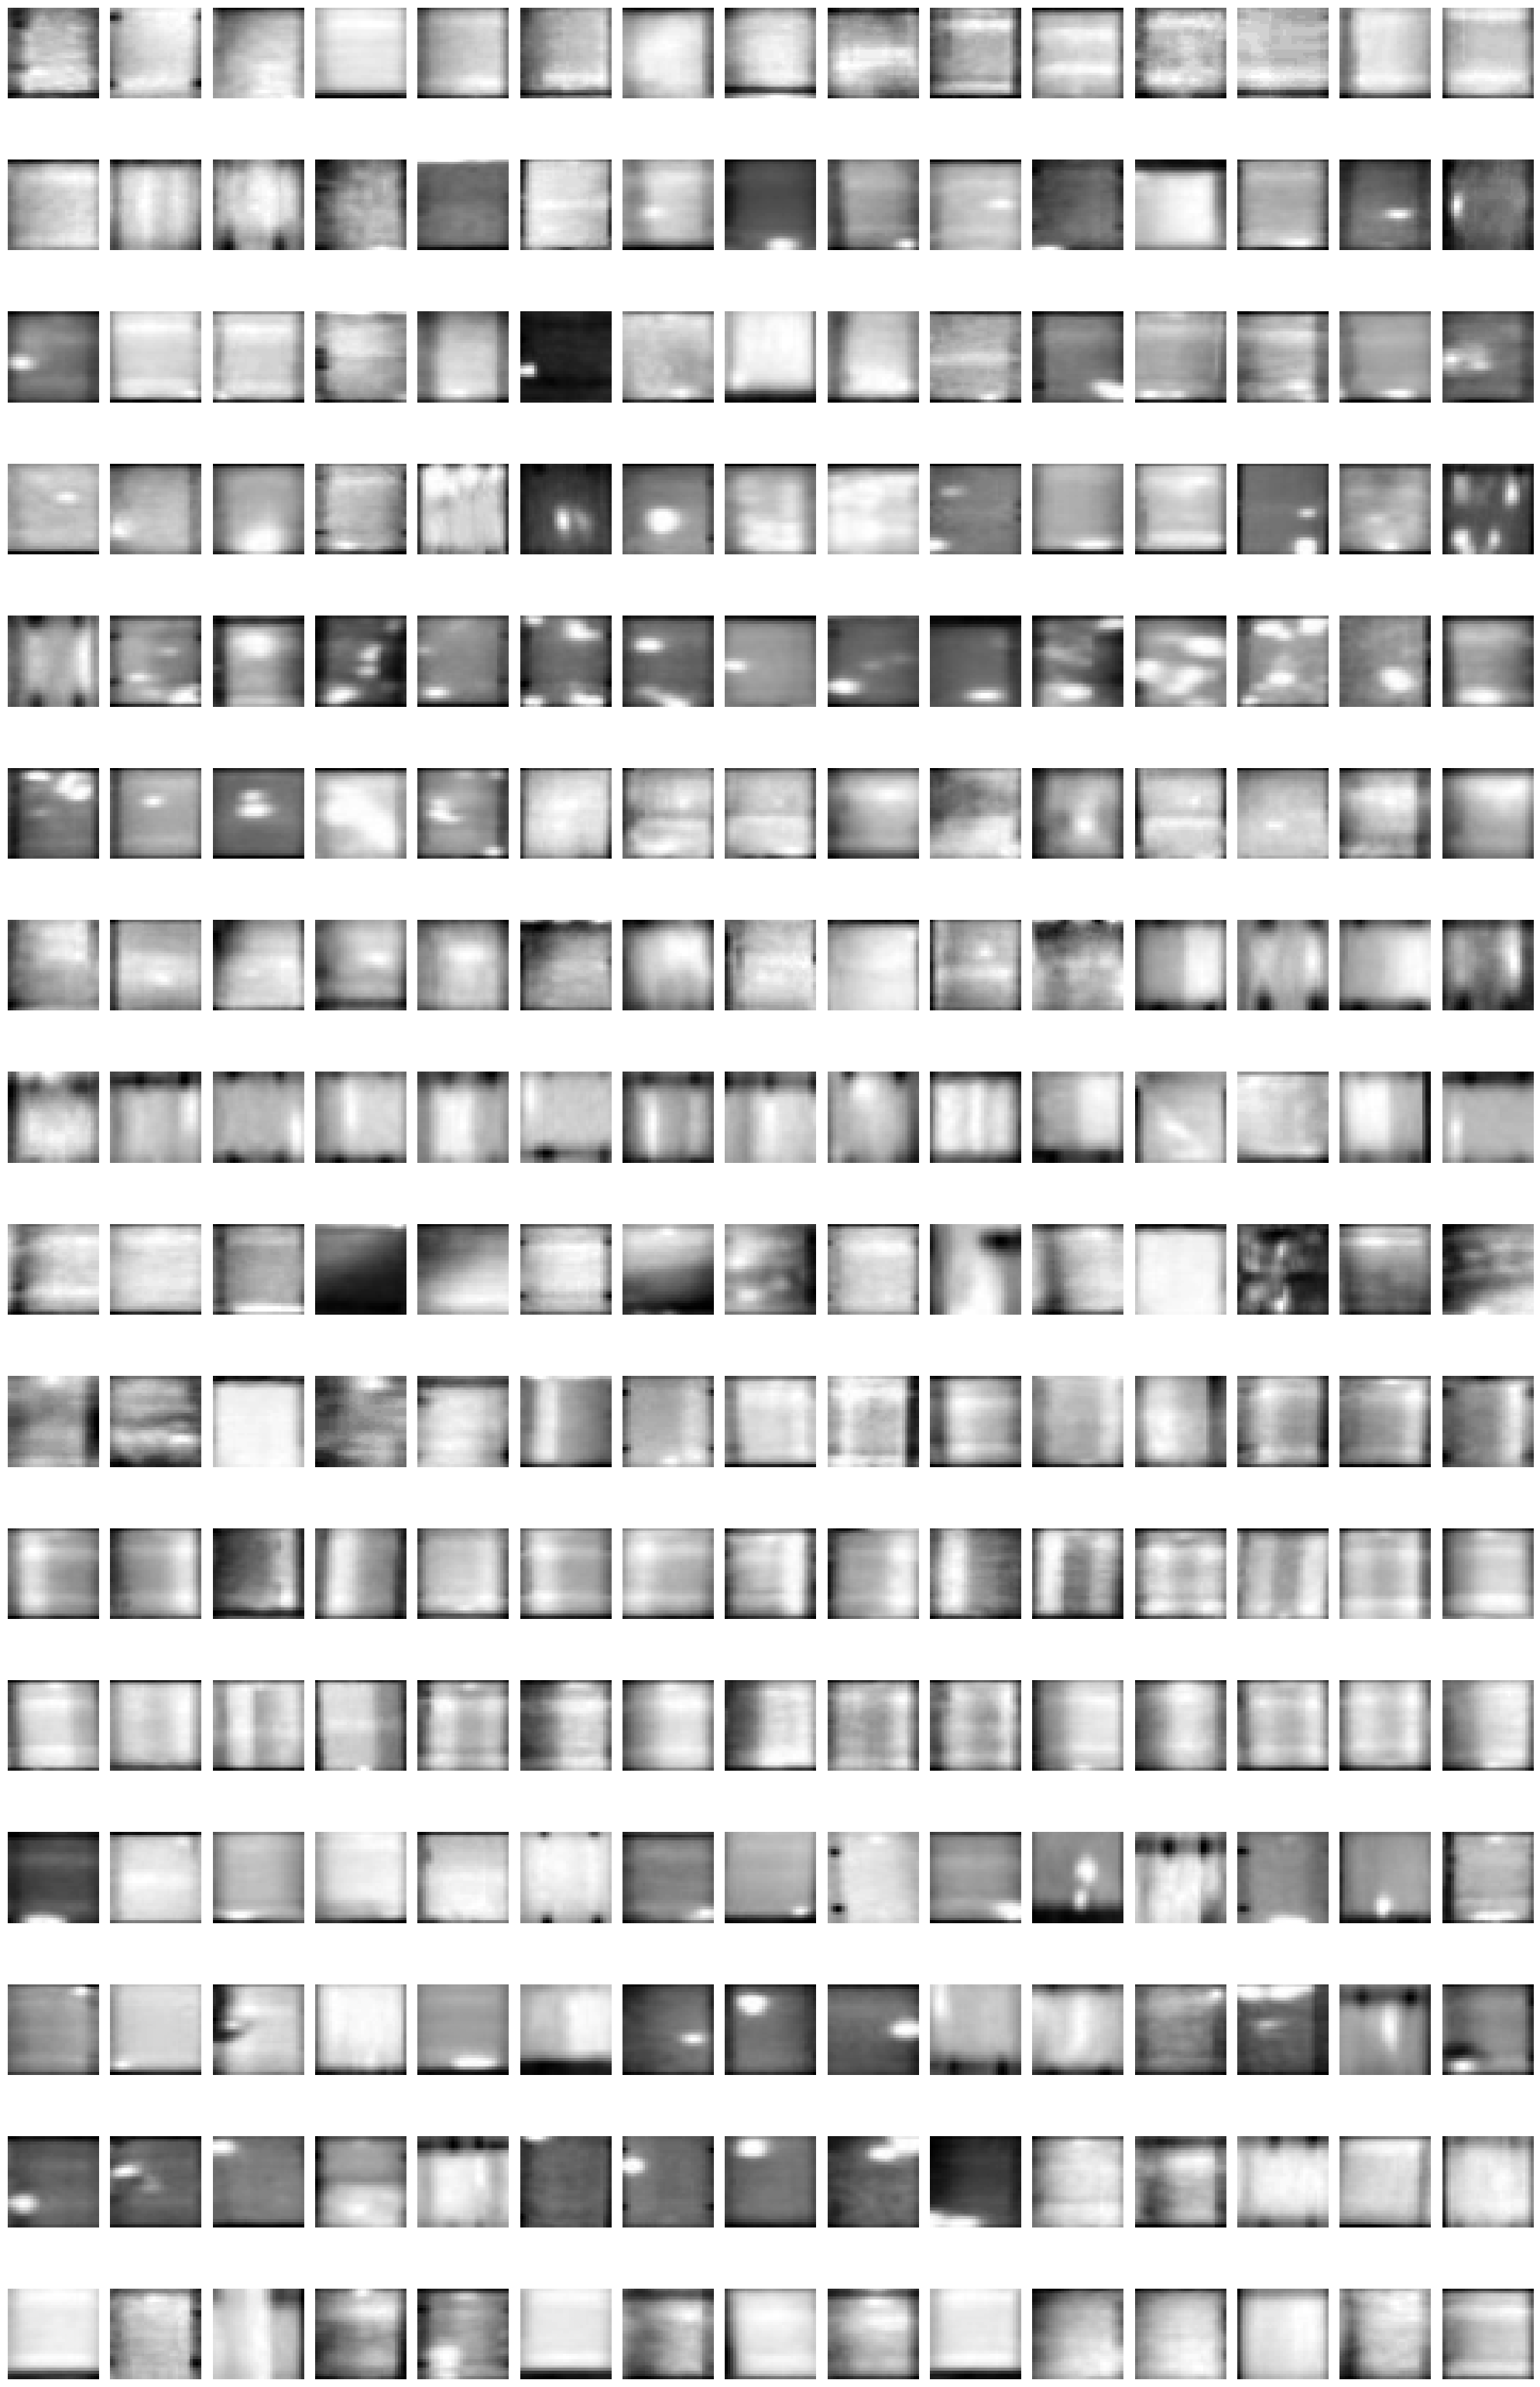

In [ ]:
# Ensure the necessary imports are available
import os
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import random

# Assuming 'mapping' and 'ID_TO_LABEL' are available from previous cells
# mapping: dictionary where keys are image filenames and values are dictionaries with label info
# ID_TO_LABEL: dictionary mapping numerical label IDs back to text labels

TEST_SIZE = 240
num_classes = len(LABEL_TO_ID) # Use the actual number of defined classes
samples_per_class = TEST_SIZE // num_classes

real_images = []
real_labels = []
real_filenames = [] # Keep track of filenames for display

# Re-initialize transforms if needed, or ensure 'transforms' variable is available
transforms = T.Compose([
    T.Resize((args.imageSize, args.imageSize)),
    T.ToTensor()
    ])

# Iterate through the numerical class IDs
for class_id in range(num_classes):
    # Find all image filenames that belong to this class ID
    class_filenames = [
        filename for filename, info in mapping.items()
        if info['numerical_label'] == class_id
    ]

    # If there are fewer images than samples_per_class, take all available images
    num_samples_to_select = min(samples_per_class, len(class_filenames))

    if num_samples_to_select == 0:
        print(f"Warning: No images found for class ID {class_id} ('{ID_TO_LABEL.get(class_id, 'Unknown')}')")
        continue

    # Randomly select filenames for this class
    selected_filenames = random.sample(class_filenames, num_samples_to_select)

    # Load and transform the selected images
    for filename in selected_filenames:
        img_path = os.path.join(image_dir, filename) # Use the correct image directory
        try:
            img = Image.open(img_path).convert('L') # Convert to grayscale if your model expects 1 channel
            img_tensor = transforms(img)
            real_images.append(img_tensor)
            real_labels.append(class_id) # Append the numerical label
            real_filenames.append(filename)
        except Exception as e:
            print(f"Error loading or processing image {filename}: {e}")


# Convert list of tensors to a single tensor if needed for later use
if real_images:
    real_images_tensor = torch.stack(real_images)
    real_labels_tensor = torch.tensor(real_labels, dtype=torch.long)
    print(f"\nSuccessfully loaded {len(real_images)} real images for testing.")
    print(f"Shape of real_images_tensor: {real_images_tensor.shape}")
else:
    print("\nNo real images were loaded for testing.")


# Plot the selected images in a grid
# Adjust subplot grid based on the actual number of classes with samples
actual_num_classes_with_samples = len(set(real_labels))
if actual_num_classes_with_samples > 0:
    # Recalculate samples per class for plotting if TEST_SIZE was not perfectly divisible
    # Use the actual number of images loaded, not necessarily plot_samples_per_class
    images_to_display = len(real_images)
    # Calculate the number of rows and columns for a square-ish grid
    n_cols = int(images_to_display**0.5)
    n_rows = (images_to_display + n_cols - 1) // n_cols # Ceiling division

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 2 * n_rows))

    # Flatten axs if it's a 2D array for easier iteration
    axs = axs.flatten()

    for i, img_tensor in enumerate(real_images):
        ax = axs[i]
        ax.imshow(img_tensor.squeeze(), cmap='gray') # Use squeeze() for single channel images
        # Optionally add title with filename or label
        # ax.set_title(f"{real_filenames[i]}\nLabel: {ID_TO_LABEL.get(real_labels[i], 'Unknown')}", fontsize=6)
        ax.axis('off')

    # Hide any unused subplots
    for i in range(images_to_display, len(axs)):
        axs[i].axis('off')

    plt.tight_layout() # Adjust layout to prevent titles overlapping
    plt.show()
else:
    print("No images to display.")

# The problematic code block below should be removed as it's redundant and incorrect.
# samples_per_class = TEST_SIZE // num_classes
# real_images = []

# for class_label in range(num_classes):
#     # Get indices of samples belonging to the current class
#     class_indices = torch.where(Dataset.targets == class_label)[0]

#     # Randomly select a subset of samples for the current class
#     # using torch.randperm for reproducibility
#     selected_indices = class_indices[torch.randperm(len(class_indices))[:samples_per_class]]

#     # Extract images corresponding to the selected indices
#     class_images = [Dataset[i][0] for i in selected_indices]

#     # Append transformed class images to the real_images list
#     real_images.extend(class_images)

In [ ]:
samples_per_class = TEST_SIZE // num_classes
real_images = []

for class_label in range(num_classes):
    # Get all filenames for current class
    class_filenames = [
        filename for filename, info in mapping.items()
        if info['numerical_label'] == class_label
    ]

    # Randomly select a subset of filenames for the current class
    selected_filenames = random.sample(
        class_filenames,
        min(samples_per_class, len(class_filenames))
    )

    # Load and transform images
    for filename in selected_filenames:
        img_path = os.path.join(image_dir, filename)
        try:
            img = Image.open(img_path).convert('L')
            img_tensor = transforms(img)
            real_images.append(img_tensor)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")


In [ ]:
def calculate_fid_during_training(TEST_SIZE, num_classes, latent_dim, genNet, device, Dataset, Batch_Size):
    """
    Calculates the FID score during training, using a subset of real and generated images
    with balanced class representation.
    """

    # --- Preparing Real Images ---
    samples_per_class = TEST_SIZE // num_classes
    real_images = []

    for class_label in range(num_classes):
        class_filenames = [
            filename for filename, info in mapping.items()
            if info['numerical_label'] == class_label
        ]

        selected_filenames = random.sample(
            class_filenames,
            min(samples_per_class, len(class_filenames))
        )

        for filename in selected_filenames:
            img_path = os.path.join(image_dir, filename)
            try:
                img = Image.open(img_path).convert('L')
                img_tensor = transforms(img)
                real_images.append(img_tensor)
            except Exception as e:
                print(f"Error loading image {filename}: {e}")

    remainder = TEST_SIZE % num_classes
    if remainder != 0:
        available_filenames = list(mapping.keys())
        selected_extra = random.sample(available_filenames, remainder)
        for filename in selected_extra:
            try:
                img_path = os.path.join(image_dir, filename)
                img = Image.open(img_path).convert('L')
                img_tensor = transforms(img)
                real_images.append(img_tensor)
            except Exception as e:
                print(f"Error loading extra image {filename}: {e}")

    real_data = torch.stack(real_images).type(torch.float32)

    # --- Generating Fake Images ---
    fake_images = []
    # Generate fake images in batches to avoid memory issues
    num_batches = (TEST_SIZE + Batch_Size - 1) // Batch_Size
    for i in range(num_batches):
        current_batch_size = min(Batch_Size, TEST_SIZE - i * Batch_Size)
        noise = torch.randn((current_batch_size, args.inputNoiseLatentDim)).to(device)

        # Generate fake labels with the correct embedding dimension
        fake_labels = generate_balanced_fake_labels(current_batch_size, num_classes).to(device)

        genNet.eval()
        with torch.no_grad():
            gen_imgs_batch = genNet(noise, fake_labels)
            fake_images.append(gen_imgs_batch)

    gen_imgs = torch.cat(fake_images, dim=0)


    # --- Calculating FID ---
    # Create temporary directories to store images
    with tempfile.TemporaryDirectory() as real_dir, tempfile.TemporaryDirectory() as gen_dir:
        # Save real images
        for i, img in enumerate(real_data):
            torchvision.utils.save_image(img, os.path.join(real_dir, f'{i}.png'))

        # Save generated images
        for i, img in enumerate(gen_imgs):
            torchvision.utils.save_image(img, os.path.join(gen_dir, f'{i}.png'))

        # Disable tqdm progress bars
        os.environ['TQDM_DISABLE'] = '1'

        fid_score_value = fid_score.calculate_fid_given_paths(
            paths=[real_dir, gen_dir],
            batch_size=Batch_Size,
            device=device,
            dims=2048
        )

    return fid_score_value

In [ ]:
def generate_balanced_fake_labels(batch_size, num_classes):
    samples_per_class = batch_size // num_classes
    balanced_labels = []

    for i in range(num_classes):
        balanced_labels.extend([i] * samples_per_class)

    remaining_samples = batch_size % num_classes
    remaining_labels = torch.randint(0, num_classes, (remaining_samples,))

    fake_labels = torch.cat([torch.tensor(balanced_labels), remaining_labels])
    fake_labels = fake_labels[torch.randperm(len(fake_labels))]

    return fake_labels


In [ ]:
def trainLoop(device: str, genNet: nn.Module, disNet: nn.Sequential,
              trainLoader: DataLoader, genOptim, disOptim, clsLossFunc,
              schedulers, ema, epoch: int, numEpochs: int, latentZDim: int,
              numClasses: int, fidScore: float):
    genNet.train()
    disNet.train()

    # برای ذخیره‌ی لاگ‌های lossها
    disResultsOneEpoch = pd.DataFrame()
    genResultsOneEpoch = pd.DataFrame()

    # مقادیر میانگین برای گزارش
    disTotalLosses, disClsLosses, disAdvLosses, dLossGPs = [], [], [], []
    genTotalLosses, genClsLosses, genAdvLosses = [], [], []

    pBar = tqdm(trainLoader, leave=True)
    for batchIdx, (realData, realLabel) in enumerate(pBar):
        # ---------------------------
        # آماده‌سازی ورودی‌ها
        # ---------------------------
        realData, realLabel = realData.to(device), realLabel.to(device)
        batchSize = realData.size(0)

        noise = torch.randn((batchSize, latentZDim), device=device)
        fakeLabels = generate_balanced_fake_labels(batchSize, numClasses).to(device)

        # ---------------------------
        # آموزش Discriminator
        # ---------------------------
        disOptim.zero_grad()

        realOutAdv, realOutCls = disNet(realData)
        fakeData = genNet(noise, fakeLabels)
        assert fakeData.shape == realData.shape, "Mismatch in fake vs real data shape."

        fakeOutAdv, _ = disNet(fakeData)

        # محاسبه گرادیان پنالتی
        alpha = torch.rand(batchSize, 1, 1, 1, device=device)
        xHat = (alpha * realData + (1 - alpha) * fakeData).requires_grad_(True)
        outSrc, _ = disNet(xHat)
        dLossGP = gradientPenalty(outSrc, xHat, device)

        # محاسبه loss کلی Discriminator
        disAdvLoss = torch.mean(fakeOutAdv) - torch.mean(realOutAdv)
        disClsLoss = clsLossFunc(realOutCls, realLabel)
        disTotalLoss = disAdvLoss + args.lambdaCls * disClsLoss + args.lambdaGP * dLossGP

        disTotalLoss.backward()
        torch.nn.utils.clip_grad_norm_(disNet.parameters(), args.normClipDis)
        disOptim.step()

        # ---------------------------
        # آموزش Generator
        # ---------------------------
        genOptim.zero_grad()

        genImgs = genNet(noise, fakeLabels)
        genOutAdv, genOutCls = disNet(genImgs)

        genAdvLoss = -torch.mean(genOutAdv)
        genClsLoss = clsLossFunc(genOutCls, fakeLabels)
        genTotalLoss = genAdvLoss + args.lambdaCls * genClsLoss

        genTotalLoss.backward()
        torch.nn.utils.clip_grad_norm_(genNet.parameters(), args.normClipGen)
        genOptim.step()

        # ---------------------------
        # EMA: برای هموارسازی وزن‌ها
        # ---------------------------
        if batchIdx % args.emaFreq == 0:
            ema.update()

        # ---------------------------
        # Scheduler
        # ---------------------------
        if schedulers:
            genSch, disSch = schedulers
            if isinstance(genSch, ReduceLROnPlateau):
                genLr = genSch.step(genTotalLoss)
                disLr = disSch.step(disTotalLoss)
            else:
                genLr = genSch.step()
                disLr = disSch.step()
        else:
            genLr, disLr = args.gLearningRate, args.dLearningRate

        # ---------------------------
        # ثبت نتایج یک batch
        # ---------------------------
        disResultsOneEpoch = concatenate([
            disTotalLoss.item(), disAdvLoss.item(), disClsLoss.item(), dLossGP.item()
        ], ['dis Total Loss', 'dis Adv Loss', 'dis Cls Loss', 'dis Loss GP'], disResultsOneEpoch)

        genResultsOneEpoch = concatenate([
            genTotalLoss.item(), genAdvLoss.item(), genClsLoss.item()
        ], ['gen Total Loss', 'gen Adv Loss', 'gen Cls Loss'], genResultsOneEpoch)

        # آپدیت tqdm
        pBar.set_description(
            f'| D Cls Loss: {disClsLoss:.4f} | D Adv Loss: {disAdvLoss:.4f} '
            f'| D GP Loss: {dLossGP:.4f} | G Cls Loss: {genClsLoss:.4f} '
            f'| G Adv Loss: {genAdvLoss:.4f} | FID: {fidScore:.4f}'
        )

        # ثبت برای میانگین‌گیری
        disTotalLosses.append(disTotalLoss.detach())
        disClsLosses.append(disClsLoss.detach())
        disAdvLosses.append(disAdvLoss.detach())
        dLossGPs.append(dLossGP.detach())

        genTotalLosses.append(genTotalLoss.detach())
        genClsLosses.append(genClsLoss.detach())
        genAdvLosses.append(genAdvLoss.detach())

    # محاسبه میانگین Lossها در یک epoch
    disResult = tuple(
        torch.stack(lst).mean().cpu().item()
        for lst in [disTotalLosses, disClsLosses, disAdvLosses, dLossGPs]
    ) + (disLr,)

    genResult = tuple(
        torch.stack(lst).mean().cpu().item()
        for lst in [genTotalLosses, genClsLosses, genAdvLosses]
    ) + (genLr,)

    return disResult, genResult


In [ ]:
def runEpochs(device: str, genNet: nn.Module, disNet: nn.Sequential,
              genOptim, disOptim, clsLossFunc, schedulers,
              numEpochs: int, latentZDim: int, numClasses: int,
              trainLoader: DataLoader):

    fidScore = calculate_fid_during_training(TEST_SIZE=5000, num_classes=numClasses, latent_dim=latentZDim, genNet=genNet, device=device, Dataset=Dataset, Batch_Size=512)
    ema = ExponentialMovingAverage(genNet.parameters(), args.emaDecay)

    disResultsAllEpochs = pd.DataFrame()
    genResultsAllEpochs = pd.DataFrame()

    for epoch in range(numEpochs):
        disResult, genResult = trainLoop(device, genNet, disNet, trainLoader,
                                         genOptim, disOptim, clsLossFunc,
                                         schedulers, ema, epoch, numEpochs,
                                         latentZDim, numClasses, fidScore)

        ema.store()
        ema.copy_to(genNet.parameters())
        generateTestImgs(genNet, epoch, device, args)

        # بروزرسانی FID در پایان هر epoch
        fidScore = calculate_fid_during_training(10000, numClasses, latentZDim, genNet, device, Dataset, 128)

        # ثبت نتایج epoch
        disResultsAllEpochs = concatenate(
            list(disResult), ['dis Total Loss', 'dis Adv Loss', 'dis Cls Loss', 'dis Loss GP', 'dis Lr'], disResultsAllEpochs
        )
        genResultsAllEpochs = concatenate(
            list(genResult), ['gen Total Loss', 'gen Adv Loss', 'gen Cls Loss', 'gen Lr'], genResultsAllEpochs
        )

        # ذخیره مدل
        ckptDir = os.path.join(args.trainRoot, 'checkpoints')
        os.makedirs(ckptDir, exist_ok=True)
        torch.save(genNet.state_dict(), os.path.join(ckptDir, f'generator_epoch_{epoch + 1}.pth'))

    return disResultsAllEpochs, genResultsAllEpochs


In [ ]:
disResults, genResults = runEpochs(
    args.device, genNet, disNet,
    genOptim, disOptim, clsLossFunc, schedulers,
    args.numEpochs, args.latentZDim,  # Correct parameter
    args.numClasses, train_loader
)

 60%|██████    | 6/10 [23:41<15:45, 236.32s/it]